# Getting Started 2: How to Load and Visualize Data for Cyber Threat Intelligence Analysis

**Open notebook on:** 
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/clandolt)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/)   
**Author:** Christoph R. Landolt

In this tutorial, we will conduct a comprehensive Exploratory Data Analysis (EDA) in Python to gain a detailed understanding of a dataset.
Exploratory Data Analysis is a fundamental step in any data science workflow. It involves systematically examining the structure, quality, and relationships within the data through data loading, data cleaning, statistical analysis, and visualization.

To ensure relevance and applicability, this tutorial will use a dataset on State-Sponsored Cyber Operations. This dataset provides an opportunity to apply EDA techniques to real-world, security-related data, helping to uncover patterns and relationships that may inform further modeling or research.
## Tutorial Objectives

By the end of this tutorial, you will be able to:
* Load, clean, and manipulate data using Pandas DataFrames
* Perform numerical operations and transformations using NumPy
* Create informative visualizations using Matplotlib and Seaborn
* Apply dimensionality reduction methods to visualize high-dimensional data

## Notebook Setup and Visualization Configuration

This section contains standard setup code that will likely be common across all notebooks in this course.  
It imports essential Python packages for data analysis and visualization, and configures the notebook for high-quality plotting.

### Key Configuration Commands

- `%matplotlib inline`  
  Ensures that all **matplotlib plots** are displayed directly within the notebook cells.

- `%config InlineBackend.figure_format`  
  Controls the output format of plots. Different formats are suited for different use cases:

| **Format** | **Description** | **When to Use** |
|------------|----------------|----------------|
| `'retina'` | High-resolution (2× DPI) PNG output | Ideal for notebooks viewed on high-DPI or Retina screens; default for high-quality visuals. |
| `'png'`    | Standard-resolution PNG output | Suitable for general use; faster rendering and smaller output size. |
| `'svg'`    | Scalable Vector Graphics (vector-based) | Best for publication-quality plots that scale without losing quality; ideal for LaTeX or web embedding. |
| `'pdf'`    | Portable Document Format (vector-based) | Useful for exporting plots to reports; less common in notebooks. |
| `'jpg'` / `'jpeg'` | Compressed raster format | Rarely used for plots due to lossy compression; generally not recommended for analysis. |


In [ ]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [65]:
# Import requiered packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go



### Modifying the Style of Graphs
Matplotlib provides several built-in styles that can be applied to improve the appearance of plots.  
In this tutorial, we will use a combination of [**Seaborn-inspired styles**](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html?utm_source=chatgpt.com) to produce clear, professional, and visually appealing figures.

In [ ]:
# Modifying the style of the graphs
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Load the Data

We can load a CSV file directly from a URL using **pandas**, or upload it from a local directory.  
The `pd.read_csv` function has many options; you can explore them in the [official documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).  

In this tutorial, we will use the [State-Sponsored Cyber Operations (2005-Present)](https://www.kaggle.com/datasets/justin2028/state-sponsored-cyber-operations-2005-present/data) dataset.  
This dataset tracks publicly known state-sponsored cyber operations since 2005 and has been compiled from official sources by the Council on Foreign Relations.

In [6]:
df = pd.read_csv(
    'cyber-operations-incidents.csv',
    delimiter=',',      # Define a custom separator (default is ',')
    header=0,           # Row to use as column names
    index_col=None,     # Column to use as row labels
    na_values=['NA'],   # Values to treat as missing
    encoding='utf-8'    # File encoding
)

**Notes:**

- `delimiter` lets you specify the character separating fields (default is comma `,`).
- `header` indicates which row to treat as column names.
- `index_col` allows using a column as the DataFrame index.
- `na_values` defines strings to interpret as missing data (`NaN`).
- Always ensure the encoding matches your file to avoid read errors.


### Data Inspection and Basic Statistics

Before performing detailed analysis, it is important to **inspect the dataset** and understand its structure.

- **Preview the first 5 rows** of the dataset:  

In [10]:
df.head()


,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Targeting of dissidents and opposition politic...,1/20/2022,Believed to be the work of Ghana's government,The Israeli spyware firm NSO Group sold Pegasu...,Denial https://www.haaretz.com/israel-news/t...,Political dissidents and opposition leaders in...,Ghana,Espionage,Civil society,https://www.haaretz.com/israel-news/tech-news/...,NaN,NaN
1,Targeting of Ukrainian state entities,3/7/2022,UNC1151,The Belarusian threat actor UNC1151 targeted m...,NaN,Ukrainian state entities,Belarus,Espionage,Government,https://cert.gov.ua/article/37626,NaN,NaN
2,Targeting of Russian and Belarusian websites,5/4/2022,Ukrainian IT Army,Ukraine?? IT Army compromised Docker Engine ho...,NaN,"Russian and Belarusian websites were targeted,...",Ukraine,Denial of service,"Government, Private sector, Civil society",https://www.crowdstrike.com/blog/compromised-d...,NaN,NaN
3,Targeting of the Belgian Federal Public Servic...,7/18/2022,Zirconium,Chinese threat actors targeted the Belgian Fed...,Denouncement https://diplomatie.belgium.be/e...,Belgian Federal Public Service Interior,China,Espionage,Government,https://diplomatie.belgium.be/en/news/declarat...,https://www.bleepingcomputer.com/news/security...,NaN
4,Targeting of Ukrainian government agencies,8/11/2022,Gamaredon,The Computer Emergency Response Team of Ukrain...,Confirmation,Ukrainian government agencies,Russian Federation,Espionage,Government,https://cert.gov.ua/article/2681855,NaN,NaN


- **Preview the last 2 rows** of the dataset:


In [14]:
df.tail(2)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
766,Trisis,NaN,Also known as Triton and Xenotime,This threat actor targets the Triconex safety ...,Confirmation https://www.justice.gov/opa/pr/...,Saudi Arabia,Russian Federation,Sabotage,Private sector,https://www.fireeye.com/blog/threat-research/2...,https://www.fireeye.com/blog/threat-research/2...,https://dragos.com/blog/trisis/TRISIS-01.pdf
767,Targeting of the Belgian Federal Public Servic...,NaN,APT 30,Chinese threat actors targeted the Belgian Fed...,Denouncement https://diplomatie.belgium.be/e...,Belgian Federal Public Service Interior,China,Espionage,Government,https://diplomatie.belgium.be/en/news/declarat...,https://www.bleepingcomputer.com/news/security...,NaN


- **Selecting specific rows:** You can extract a subset of rows using slicing.  
  For example, to select rows 3 to 6 (inclusive of 3, exclusive of 7):

In [19]:
df[3:7]

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
3,Targeting of the Belgian Federal Public Servic...,7/18/2022,Zirconium,Chinese threat actors targeted the Belgian Fed...,Denouncement https://diplomatie.belgium.be/e...,Belgian Federal Public Service Interior,China,Espionage,Government,https://diplomatie.belgium.be/en/news/declarat...,https://www.bleepingcomputer.com/news/security...,NaN
4,Targeting of Ukrainian government agencies,8/11/2022,Gamaredon,The Computer Emergency Response Team of Ukrain...,Confirmation,Ukrainian government agencies,Russian Federation,Espionage,Government,https://cert.gov.ua/article/2681855,NaN,NaN
5,Targeting of Palestinian entities and activists,2/2/2022,APT-C-23,The Hamas-linked threat actor APT-C-23 used ma...,NaN,NaN,NaN,Espionage,Civil society,https://www.cyberscoop.com/palestinian-targete...,https://blog.talosintelligence.com/2022/02/ari...,NaN
6,Targeting of government agencies in the Europe...,4/5/2022,Gamaredon,Russian threat actor Gamaredon targeted Ukrain...,Confirmation https://cert.gov.ua/article/39086,Government agencies of EU member states,Russian Federation,Espionage,Government,https://www.bleepingcomputer.com/news/security...,NaN,NaN


- **By label using `df.loc`:** Selects rows and columns by their names or index labels.  
    Example: Select rows 3 to 7 and the columns `"Title"`, `"Date"`, and `"Sponsor"`:


In [20]:
df.loc[3:7, ["Title", "Date", "Sponsor"]]

,Title,Date,Sponsor
3,Targeting of the Belgian Federal Public Servic...,7/18/2022,China
4,Targeting of Ukrainian government agencies,8/11/2022,Russian Federation
5,Targeting of Palestinian entities and activists,2/2/2022,NaN
6,Targeting of government agencies in the Europe...,4/5/2022,Russian Federation
7,Targeting of Rostec,5/19/2022,China


  - **By position using `df.iloc`:** Selects rows and columns by integer index positions.  
    Example: Select rows 0, 1, 3, 4, 6 and columns 0 to 2:

In [27]:
df.iloc[[0,1,3,4,6], 0:3]

,Title,Date,Affiliations
0,Targeting of dissidents and opposition politic...,1/20/2022,Believed to be the work of Ghana's government
1,Targeting of Ukrainian state entities,3/7/2022,UNC1151
3,Targeting of the Belgian Federal Public Servic...,7/18/2022,Zirconium
4,Targeting of Ukrainian government agencies,8/11/2022,Gamaredon
6,Targeting of government agencies in the Europe...,4/5/2022,Gamaredon


-  **Obtain a concise summary** of the dataset, including column names, non-null counts, and data types:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         768 non-null    object
 1   Date          753 non-null    object
 2   Affiliations  621 non-null    object
 3   Description   768 non-null    object
 4   Response      186 non-null    object
 5   Victims       741 non-null    object
 6   Sponsor       728 non-null    object
 7   Type          731 non-null    object
 8   Category      743 non-null    object
 9   Sources_1     763 non-null    object
 10  Sources_2     488 non-null    object
 11  Sources_3     190 non-null    object
dtypes: object(12)
memory usage: 72.1+ KB


- **Generate descriptive statistics** for all numeric columns, such as mean, standard deviation, minimum, and maximum values:

In [8]:
df.describe()

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
count,768,753,621,768,186,741,728,731,743,763,488,190
unique,764,603,377,767,128,657,61,12,35,715,470,186
top,Targeting of Southeast Asian telecommunication...,10/4/2018,Lazarus Group,Chinese threat actors targeted the Belgian Fed...,Unknown,United States,China,Espionage,Private sector,https://blogs.microsoft.com/on-the-issues/2020...,https://www.bleepingcomputer.com/news/security...,https://www.fireeye.com/content/dam/fireeye-ww...
freq,2,6,26,2,47,21,263,608,199,5,3,2


- The dataset contains **768 rows** and **12 columns**:

In [9]:
df.shape

(768, 12)

In [15]:
# Number of rows/observations - the data numerosity
df.shape[0]

768

In [16]:
# Number of features/column/attributes - the data dimensionality
df.shape[1]

12

These commands provide a first overview of the data, helping identify missing values, data types, and key summary statistics.

## Data Cleaning and Preparation
We can **list all columns** and **check their data types** using:


In [17]:
df.columns

Index(['Title', 'Date', 'Affiliations', 'Description', 'Response', 'Victims',
       'Sponsor', 'Type', 'Category', 'Sources_1', 'Sources_2', 'Sources_3'],
      dtype='object')

In [18]:
df.dtypes

Title           object
Date            object
Affiliations    object
Description     object
Response        object
Victims         object
Sponsor         object
Type            object
Category        object
Sources_1       object
Sources_2       object
Sources_3       object
dtype: object

- Columns with the data type `object` are strings.  
- Some columns, such as dates, are better represented in a proper **datetime format**.  
- To convert strings to datetime, we can use `pd.to_datetime`. Before doing so, it is important to understand **Python date parsing conventions**. See the [official documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) for reference.  

- Relevant formatting codes include:
  - `%m` – Month as a zero-padded decimal number  
  - `%d` – Day of the month as a zero-padded decimal number  
  - `%Y` – Year with century as a decimal number

In [32]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.dtypes


Title                   object
Date            datetime64[ns]
Affiliations            object
Description             object
Response                object
Victims                 object
Sponsor                 object
Type                    object
Category                object
Sources_1               object
Sources_2               object
Sources_3               object
dtype: object

In [31]:
df.head(2)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Targeting of dissidents and opposition politic...,2022-01-20,Believed to be the work of Ghana's government,The Israeli spyware firm NSO Group sold Pegasu...,Denial https://www.haaretz.com/israel-news/t...,Political dissidents and opposition leaders in...,Ghana,Espionage,Civil society,https://www.haaretz.com/israel-news/tech-news/...,NaN,NaN
1,Targeting of Ukrainian state entities,2022-03-07,UNC1151,The Belarusian threat actor UNC1151 targeted m...,NaN,Ukrainian state entities,Belarus,Espionage,Government,https://cert.gov.ua/article/37626,NaN,NaN


In [48]:
df[df.duplicated()==True]


,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3


In [49]:
df.loc[df.duplicated(subset=['Description'], keep=False)]


,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
3,Targeting of the Belgian Federal Public Servic...,2022-07-18,Zirconium,Chinese threat actors targeted the Belgian Fed...,Denouncement https://diplomatie.belgium.be/e...,Belgian Federal Public Service Interior,China,Espionage,Government,https://diplomatie.belgium.be/en/news/declarat...,https://www.bleepingcomputer.com/news/security...,NaN
767,Targeting of the Belgian Federal Public Servic...,NaT,APT 30,Chinese threat actors targeted the Belgian Fed...,Denouncement https://diplomatie.belgium.be/e...,Belgian Federal Public Service Interior,China,Espionage,Government,https://diplomatie.belgium.be/en/news/declarat...,https://www.bleepingcomputer.com/news/security...,NaN


### Boolean Indexing
Boolean indexing allows us to **filter rows based on one or more conditions**.  
For example, we can select operations conducted by a specific sponsor within a given date range.

In [ ]:
# Define date range for 2022-2023
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2023-12-31')

# Boolean condition
boolean_condition = (df['Sponsor'] == 'Belarus') & (df['Date'] >= start_date) & (df['Date'] <= end_date)

# Filtered DataFrame
df_filtered = df[boolean_condition]

df_filtered.shape[0] # Number of rows in the filtered DataFrame

2

### Aggregation

Aggregation allows us to **summarize data by groups**, which is useful to identify patterns and trends in cyber operations.  

- For example, we can **count the number of cyber operations conducted by each sponsor**

In [44]:
# Count the number of cyber operations per sponsor
df.groupby("Sponsor", as_index=False).size().sort_values(by='size', ascending=False)

,Sponsor,size
6,China,263
37,Russian Federation,155
20,Iran (Islamic Republic of),98
26,Korea (Democratic People's Republic of),79
53,United States,12
...,...,...
25,Kazakhstan,1
28,Lebanon,1
31,Myanmar,1
32,Netherlands,1


**Explanation:**

- `groupby("Sponsor")` groups the data by the `Sponsor` column.  
- `.size()` counts the number of rows in each group, representing the number of operations.  
- `.sort_values(by='size', ascending=False)` sorts the sponsors from **most to least active**.


- **Sum the number of victims per sponsor** to identify which sponsors have caused the greatest impact:


In [45]:
# Sum the number of victims per sponsor
df.groupby("Sponsor", as_index=False)["Victims"].sum().sort_values(by="Victims", ascending=False)


,Sponsor,Victims
55,"United States, Australia, Canada, New Zealand,...",Yandex
27,Korea (Republic of),World Health OrganizationNorth Koreans and Nor...
59,Uzbekistan,Uzbek activists and dissidents
28,Lebanon,"United States, Canada, Germany, Lebanon, France"
3,Belarus,Ukrainian state entitiesOver seventy Ukrainian...
...,...,...
21,Israel,An activist in IsraelMayors and other local of...
52,"United Kingdom, United States","Algeria, Afghanistan, Belgium, Brazil, Fiji, G..."
20,Iran (Islamic Republic of),Albanian government networksVMware Horizon ser...
39,"Saudi Arabia, United Arab Emirates",Al Jazeera employees


### Individual Variables Exploration

In [53]:
df['Date'].dt.year.value_counts().sort_index()

Date
2005.0      1
2006.0      3
2007.0     10
2008.0      7
2009.0      4
2010.0      9
2011.0     15
2012.0     12
2013.0     18
2014.0     32
2015.0     34
2016.0     33
2017.0     46
2018.0     80
2019.0     74
2020.0    120
2021.0    108
2022.0    147
Name: count, dtype: int64

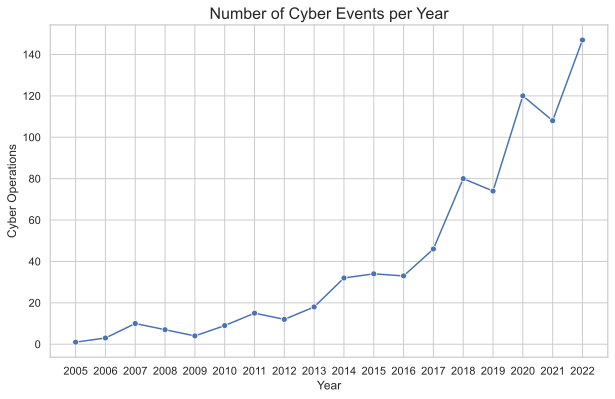

In [57]:

# Extract number of cyber operations per year
cyber_per_year = df['Date'].dt.year.value_counts().sort_index()

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10,6))
sns.lineplot(x=cyber_per_year.index.astype(int), y=cyber_per_year.values, marker="o")
plt.title("Number of Cyber Events per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cyber Operations", fontsize=12)
plt.xticks(cyber_per_year.index.astype(int))  # Ensure x-axis shows integer ticks
plt.grid(True)
plt.show()

In [59]:
aff_counts = df[df.Affiliations!='Unknown'].Affiliations.value_counts()
aff_counts.nlargest(15)

Affiliations
Lazarus Group                                     26
APT 28                                            15
Believed to be the work of APT 28                 15
Sandworm                                          15
Winnti Umbrella                                   10
Mustang Panda                                     10
Gamaredon                                         10
Ocean Lotus                                        9
MuddyWater                                         9
Kimsuky                                            9
Charming Kitten                                    8
Believed to be the work of?APT 28                  7
Turla                                              7
Believed to be the work of Russia's government     6
APT 10                                             6
Name: count, dtype: int64

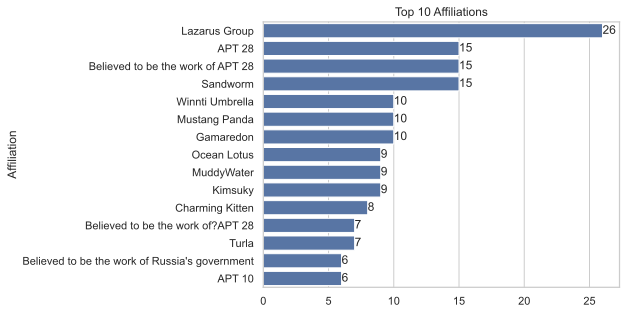

In [61]:
top_10_aff = aff_counts.nlargest(15)
plt.figure()
ax = sns.barplot(x=top_10_aff.values, y=top_10_aff.index)
ax.bar_label(ax.containers[0])
ax.set_title('Top 10 Affiliations')
plt.ylabel('Affiliation')
plt.show()

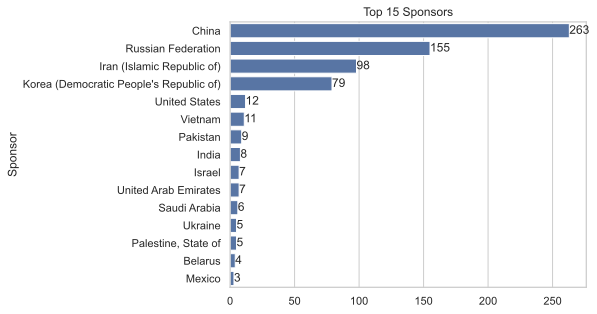

In [62]:
top_15_sponsors = df[df.Sponsor!='Unknown'].Sponsor.value_counts().nlargest(15)
plt.figure()
ax = sns.barplot(x=top_15_sponsors.values, y=top_15_sponsors.index)
ax.bar_label(ax.containers[0])
ax.set_title('Top 15 Sponsors')
plt.ylabel('Sponsor')
plt.show()

## Exercises

Answer the following Questions about the Dataset